# **ALGORITMA KLASIFIKASI NAIVE BAYES**

# **Import Modul**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# **Model Klasifikasi Naive Bayes**

Model klasifikasi Naive Bayes merupakan model klasifikasi dengan dasar gagasan Teorema Bayes dengan asumsi semua variabel prediktornya (X) adalah saling independen. Model Naive Bayes mudah untuk dibangun. Model ini tidak memiliki estimasi parameter iteratif yang kompleks yang membuatnya cocok untuk data syang sangat besar. Terlepas dari kesederhanaannya, model klasifikasi ini sering kali bekerja dengan sangat baik dan banyak digunakan karena sering mengungguli metode klasifikasi yang lebih canggih. Contohnya pada klasifikasi sentimen pada dataset teks, klasifikasi email spam, dan klasifikasi dokumen.

#**Algoritma Naive Bayes**

Teorema Bayes menyajikan cara untuk menghitung probabilitas bersyarat  (posterior) $P(Y=y|X=(x_1,x_2,...,x_n))$, dari $P(Y=y)$, $P(X=(x_1,x_2,...,x_n))$, dan $P(X=(x_1,x_2,...,x_n)|Y=y)$. Model klasifikasi Naive Bayes megasumsikan bahwa pengaruh suatu variabel prediktor $x$ pada kelas tertentu $c$ tidak bergantung pada nilai-nilai prediktor lainnya. Asumsi ini disebut sebagai **clas conditional independence**.

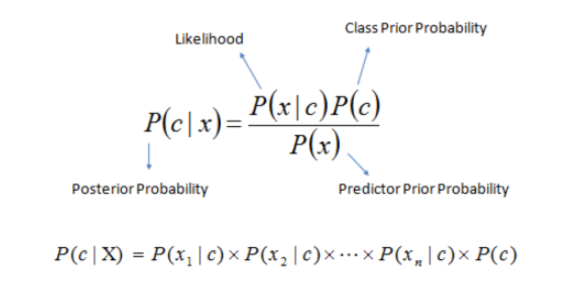

* $P(Y|X)$ adalah probabilitas bersyarat (posterior) dari kelas (target) dengan suatu prediktor yang diketahui (attribut).
* $P(Y)$ adalah probabilitas prior dari kelas.
$ P(X|Y)$ adalah likelihood yang merupakan probabilitas prediktor dengan kelas yang diketahui.
* $P(X)$ adalah probabilitas prior dari prediktor (atribut).


# **Perhitungan Manual Metode Klasifikasi Naive Bayes Data Categorical**

Misal kita memiliki dataset sebagai berikut:

In [2]:
df=pd.DataFrame({'x_1':[0,0,1,0,2,1,0,2,2,1],
                 'x_2':[0,1,2,0,2,1,2,0,1,0],
                 'y':[0,1,1,1,0,0,1,0,0,0]})
df

,x_1,x_2,y
0,0,0,0
1,0,1,1
2,1,2,1
3,0,0,1
4,2,2,0
5,1,1,0
6,0,2,1
7,2,0,0
8,2,1,0
9,1,0,0


Misal kita akan menghitung $P(Y=0|X=(0,2))$ dan $P(Y=1|X=(0,2))$

Langkah-langkahnya adalah sebagai berikut:
1. Menghitung probabilitas prior
2. Menghitung probabilitas likelihood
3. Menghitung probabilitas likelihood dan probabilitas prior

Berikut contohnya:
1. Menghitung probabilitas prior

$$ \begin{aligned}
& P(Y=0)=\frac{Jumlah \ Y=0}{Jumlah \ Y=0+ \ Jumlah \ Y=1}=\frac{6}{10}\\
& P(Y=1)=\frac{Jumlah \ Y=1}{Jumlah \ Y=0+ \ Jumlah \ Y=1}=\frac{4}{10}\\
\end{aligned}$$

\\

2. Menghitung probabilitas likelihood

$$ \begin{aligned}
& P(X=(0,2)|Y=0)=\frac{Jumlah \ X=(0,2)}{Jumlah \ Y=0}=\frac{0}{6}=0\\
& P(X=(0,2)|Y=1)=\frac{Jumlah \ X=(0,2)}{Jumlah \ Y=1}=\frac{1}{4}\\
\end{aligned}$$

\\

Cara lain adalah dengan menggunakan teorema Bayes:

$$\begin{aligned}
& P(X=(0,2)|Y=0)=P(X_1=0|Y=0)*P(X_2=2|Y=0)=\frac{1}{6}*\frac{1}{6}=\frac{1}{36}\\
&  P(X=(0,2)|Y=1)=P(X_1=0|Y=1)*P(X_2=2|Y=1)=\frac{3}{4}*\frac{2}{4}=\frac{6}{16}\\
\end{aligned}$$

\\

3. Mengalikan probabilitas likelihood dan probabilitas prior

$\begin{aligned}
& P(Y=0|X=(0,2))==>\frac{1}{36}*\frac{6}{10}=\frac{6}{360}=0.02\\
& P(Y=1|X=(0,2))==>\frac{6}{16}*\frac{4}{10}=\frac{24}{160}=0.15\\
\end{aligned}$

\\

Dari hasil terakhir di atas diperoleh bahwa probabilitas muncul kelas y=1 dengan syarat x=(0,2) adalah yg lebih tinggi maka untuk input x=(0,2) hasil klasifikasinya adalah y=1

# **Implementasi Pada Python**

**Import Library**

In [3]:
import pandas as pd
import numpy as np

**DataFrame Input**

In [4]:
df=pd.DataFrame({'x_1':[0,0,1,0,2,1,0,2,2,1],
                 'x_2':[0,1,2,0,2,1,2,0,1,0],
                 'y':[0,1,1,1,0,0,1,0,0,0]})
df

,x_1,x_2,y
0,0,0,0
1,0,1,1
2,1,2,1
3,0,0,1
4,2,2,0
5,1,1,0
6,0,2,1
7,2,0,0
8,2,1,0
9,1,0,0


**Naive Bayes untuk Data Categorical**

In [5]:
def prob_prior(df,Y):
  label_kelas=sorted(list(df[Y].unique()))
  prior=[]
  for i in label_kelas:
    prior.append(len(df[df[Y]==i])/len(df))
  return prior

In [14]:
def likelihood_categorical(df, nam_var, nilai_var, Y, label):
  #feat=list(df.columns)
  df=df[df[Y]==label]
  p_x_dgsyrt_y=len(df[df[nam_var]==nilai_var])/len(df)
  return p_x_dgsyrt_y

In [8]:
def naive_bayes_categorical(df, X, Y):
    # mengambil nama kolom
    nama_kolom = list(df.columns)[:-1]
    
    # menghitung prob prior
    prior = prob_prior(df, Y)
    
    Y_pred = []
    # lopping pada setiap baris data
    for x in X:
        # menghitung likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(nama_kolom)):
                likelihood[j] *= likelihood_categorical(df, nama_kolom[i], x[i], Y, labels[j]) 

        # menghitung posterior probability
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))
    return np.array(Y_pred)

In [15]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values
Y_pred=naive_bayes_categorical(df, X=X, Y="y")

In [16]:
X

array([[0, 0],
       [0, 1],
       [1, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [0, 2],
       [2, 0],
       [2, 1],
       [1, 0]])

In [17]:
Y_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0])

In [18]:
Y

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 0])

# **Implementasi Pada Data Real**

**Loading Dataset**

In [38]:
dataset=pd.read_csv('https://github.com/TyasArgani/PSDS-Kelas-Mahir/raw/main/caesarian%20(1).csv')
#Melihat ukuran dataset
print(dataset.shape)
#Menampilkan 5 data teratas
dataset.head()

(80, 6)


,Age,Dev_number,Dev_time,Blood_preassure,heart_problem,caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


**Membagi Data jadi Training & Testing**

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

**Training Mode**

In [45]:
X = dataset.drop(["caesarian"], axis = 1)
Y = dataset["caesarian"]

from sklearn.naive_bayes import GaussianNB
modelnb = GaussianNB()

nbtrain = modelnb.fit(x_train, y_train)
nbtrain.class_count_

Y_pred=y_pred = nbtrain.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, Y_pred))

0.4375


# **Metode Klasifikasi Naive Bayes Data Numerik**

In [50]:
from sklearn import datasets
import pandas as pd 
pd=pd.DataFrame(datasets.load_wine().data)
pd.columns=datasets.load_wine().feature_names
pd.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


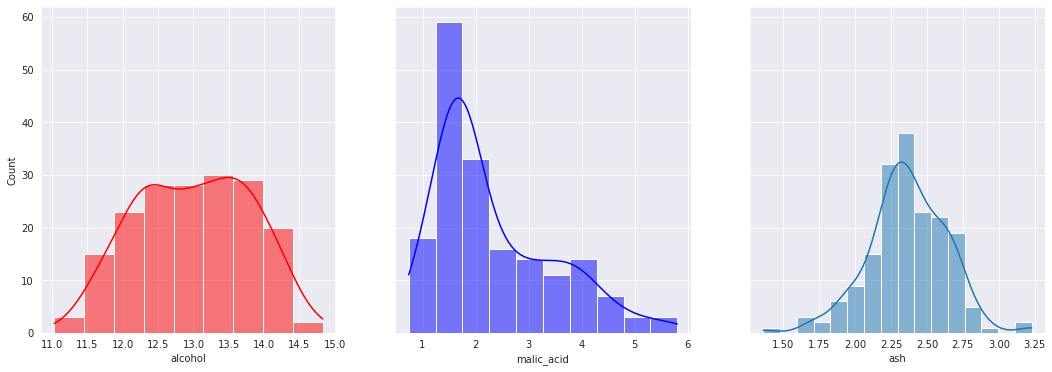

In [53]:
fig, axes=plt.subplots(1,3, figsize=(18,6),sharey=True)
sns.histplot(pd, ax=axes[0], x="alcohol",kde=True, color='r')
sns.histplot(pd, ax=axes[1], x="malic_acid",kde=True, color='b')
sns.histplot(pd, ax=axes[2], x="ash",kde=True)
plt.show()

**Naive Bayes untuk Data Numerik**

In [54]:
def prob_prior(df,Y):
  label_kelas=sorted(list(df[Y].unique()))
  prior=[]
  for i in label_kelas:
    prior.append(len(df[df[Y]==i])/len(df))
  return prior

In [55]:
def likelihood_categorical(df, nam_var, nilai_var, Y, label):
  feat=list(df.columns)
  df=df[df[Y]==label]
  mean, std = df[nam_var].mean(), df[nam_var].std()
  p_x_dgsyrt_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((nilai_var-mean)**2
                                                              / (2 * std**2 )))
  return p_x_dgsyrt_y

In [60]:
def naive_bayes_gaussian(df, X, Y):
    # mengambil nama kolom
    nama_kolom = list(df.columns)[:-1]
    
    # menghitung prob prior
    prior = prob_prior(df, Y)
    
    Y_pred = []
    # lopping pada setiap baris data
    for x in X:
        # menghitung likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(nama_kolom)):
                likelihood[j] *= likelihood_categorical(df, nama_kolom[i], x[i], Y, 
                                                        labels[j]) 

        # menghitung posterior probability
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))
    return np.array(Y_pred)

In [72]:
X_latih, X_uji, y_latih, y_uji=train_test_split(X,y,test_size=0.20,
                                                random_state=1234)

X,y=X,y=wine.data, wine.target

from sklearn.naive_bayes import GaussianNB
modelnb = GaussianNB()

nbtrain = modelnb.fit(X_latih, y_latih)
nbtrain.class_count_

Y_pred=y_pred = nbtrain.predict(X_uji)

In [73]:
print(accuracy_score(y_uji, Y_pred))

0.8888888888888888
